In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [102]:
coffee_production = pd.read_csv('../Data/Raw/coffee_production/Coffee_production.csv')
print(coffee_production.head())
print(coffee_production.shape)
coffee_production

                            Country      Coffee type       1990/91  \
0                            Angola  Robusta/Arabica  3.000000e+06   
1  Bolivia (Plurinational State of)          Arabica  7.380000e+06   
2                            Brazil  Arabica/Robusta  1.637160e+09   
3                           Burundi  Arabica/Robusta  2.922000e+07   
4                           Ecuador  Arabica/Robusta  9.024000e+07   

        1991/92       1992/93       1993/94       1994/95       1995/96  \
0  4.740000e+06  4.680000e+06  1.980000e+06  4.620000e+06  3.720000e+06   
1  6.240000e+06  7.200000e+06  3.060000e+06  7.020000e+06  8.520000e+06   
2  1.637580e+09  2.076180e+09  1.690020e+09  1.691520e+09  1.083600e+09   
3  4.002000e+07  3.720000e+07  2.358000e+07  3.984000e+07  2.604000e+07   
4  1.274400e+08  7.110000e+07  1.241400e+08  1.425600e+08  1.132800e+08   

        1996/97       1997/98  ...       2011/12       2012/13       2013/14  \
0  4.260000e+06  3.840000e+06  ...  1.740000e+06

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09
5,Indonesia,Robusta/Arabica,4.464600e+08,5.095800e+08,3.341400e+08,4.045800e+08,3.220800e+08,2.743800e+08,4.932600e+08,4.572600e+08,...,4.133400e+08,7.842000e+08,7.740600e+08,6.567600e+08,7.551000e+08,6.924600e+08,6.511200e+08,5.770800e+08,6.859800e+08,1.540488e+10
6,Madagascar,Robusta,5.892000e+07,5.598000e+07,6.732000e+07,2.652000e+07,3.846000e+07,4.710000e+07,5.094000e+07,3.744000e+07,...,3.510000e+07,3.000000e+07,3.504000e+07,3.006000e+07,2.484000e+07,2.718000e+07,2.424000e+07,2.274000e+07,2.298000e+07,1.045560e+09
7,Malawi,Arabica,6.300000e+06,7.440000e+06,8.220000e+06,3.720000e+06,5.040000e+06,5.460000e+06,2.940000e+06,3.660000e+06,...,1.560000e+06,1.380000e+06,1.680000e+06,1.500000e+06,1.260000e+06,1.200000e+06,8.400000e+05,7.800000e+05,9.600000e+05,8.226000e+07
8,Papua New Guinea,Arabica/Robusta,5.778000e+07,4.482000e+07,5.400000e+07,6.114000e+07,6.834000e+07,6.012000e+07,6.534000e+07,6.444000e+07,...,8.484000e+07,4.296000e+07,5.010000e+07,4.788000e+07,4.272000e+07,7.026000e+07,4.404000e+07,5.580000e+07,4.512000e+07,1.803120e+09
9,Paraguay,Arabica,7.860000e+06,4.800000e+06,3.240000e+06,4.020000e+06,1.500000e+06,1.560000e+06,1.860000e+06,2.940000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,6.222000e+07


In [103]:
# Delete 'Total_production' as aggregates will be computed through yearly summation
del coffee_production['Total_production']

# Columns to remain unchanged
id_vars = ['Country', 'Coffee type']

# Melt to reshape the DataFrame with one row for each column 
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
coffee_production_unpivoted = pd.melt(coffee_production, id_vars=id_vars, var_name='Year', value_name='Total Production')

# Display the resulting DataFrame
coffee_production_unpivoted

,Country,Coffee type,Year,Total Production
0,Angola,Robusta/Arabica,1990/91,3.000000e+06
1,Bolivia (Plurinational State of),Arabica,1990/91,7.380000e+06
2,Brazil,Arabica/Robusta,1990/91,1.637160e+09
3,Burundi,Arabica/Robusta,1990/91,2.922000e+07
4,Ecuador,Arabica/Robusta,1990/91,9.024000e+07
...,...,...,...,...
1645,Trinidad & Tobago,Robusta,2019/20,7.200000e+05
1646,Uganda,Robusta/Arabica,2019/20,3.305400e+08
1647,Venezuela,Arabica,2019/20,3.900000e+07
1648,Viet Nam,Robusta/Arabica,2019/20,1.829220e+09


In [104]:
# Split by '/' delimiter to obtain just 1st year
coffee_production_split = coffee_production_unpivoted['Year'].str.split('/', expand=True)

# From index[0], append year back to orig df
coffee_production_unpivoted['Years'] = coffee_production_split[0]

# Delete previous 'Year' column
del coffee_production_unpivoted['Year']

# Rename df
coffee_production_cleaned = coffee_production_unpivoted

# New order of df 
new_order = ['Country', 'Coffee type', 'Years', 'Total Production']

# Set new order of df back to orig
coffee_production_cleaned = coffee_production_cleaned[new_order]

# Last clean on Bolivia to just have country name
bolivia_clean = coffee_production_cleaned['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
coffee_production_cleaned['Country'] = bolivia_clean

coffee_production_cleaned


,Country,Coffee type,Years,Total Production
0,Angola,Robusta/Arabica,1990,3.000000e+06
1,Bolivia,Arabica,1990,7.380000e+06
2,Brazil,Arabica/Robusta,1990,1.637160e+09
3,Burundi,Arabica/Robusta,1990,2.922000e+07
4,Ecuador,Arabica/Robusta,1990,9.024000e+07
...,...,...,...,...
1645,Trinidad & Tobago,Robusta,2019,7.200000e+05
1646,Uganda,Robusta/Arabica,2019,3.305400e+08
1647,Venezuela,Arabica,2019,3.900000e+07
1648,Viet Nam,Robusta/Arabica,2019,1.829220e+09


## Coffee Production Coordinates merge 

In [105]:
# Read in coffee cities coordinates, encode do to characters not being registered by default 'UTF-8'
# https://docs.python.org/3/library/codecs.html#standard-encodings
coffee_cities = pd.read_csv('../Data/Raw/coffee_cities_coordinates.csv', encoding='iso-8859-1')

# Reorder and remove City_country & country coordinates
coffee_cities = coffee_cities[['Country','City','Latitude','Longitude']]
coffee_cities.head()

# Merge the two dataframes on 'Country'
coffee_production_df = pd.DataFrame.merge(coffee_production_cleaned, coffee_cities, on=['Country'])

# Reorder df
coffee_production_df = coffee_production_df[['Country','City','Latitude','Longitude','Coffee type',
                                            'Years','Total Production']]

coffee_production_df.head()

,Country,City,Latitude,Longitude,Coffee type,Years,Total Production
0,Angola,Bailundo,-12.165,15.3694,Robusta/Arabica,1990,3000000.0
1,Angola,Bailundo,-12.165,15.3694,Robusta/Arabica,1991,4740000.0
2,Angola,Bailundo,-12.165,15.3694,Robusta/Arabica,1992,4680000.0
3,Angola,Bailundo,-12.165,15.3694,Robusta/Arabica,1993,1980000.0
4,Angola,Bailundo,-12.165,15.3694,Robusta/Arabica,1994,4620000.0


### Analysis of Country Production


In [106]:
# How many coffee producing countries and the years 
start_year = coffee_production_df['Years'].min()
end_year = coffee_production_df['Years'].max()

number_of_countries = coffee_production_df['Country'].nunique()
print(f'The total number of countries producing coffee is {number_of_countries} from {start_year} - {end_year}.')

# Summary statistics of coffee production for each country
total_production_sum = coffee_production_df.groupby("Country")["Total Production"].sum()
total_production_mean = coffee_production_df.groupby("Country")["Total Production"].mean()
total_production_median = coffee_production_df.groupby("Country")["Total Production"].median()
total_production_variance = coffee_production_df.groupby("Country")["Total Production"].var()
total_production_std = coffee_production_df.groupby("Country")["Total Production"].std()
total_production_sem = coffee_production_df.groupby("Country")["Total Production"].sem()

# Append summary statistics to df
total_production_summary_statistics = pd.DataFrame({"Total Production Sum": total_production_sum,
                                        "Total Production Mean": total_production_mean,
                                        "Total Production Median": total_production_median,
                                        "Total Production Variance": total_production_variance,
                                        "Total Production Stand Deviation": total_production_std,
                                        "Total Production SEM": total_production_sem})

total_production_summary_statistics.head()

The total number of countries producing coffee is 53 from 1990 - 2019.


,Total Production Sum,Total Production Mean,Total Production Median,Total Production Variance,Total Production Stand Deviation,Total Production SEM
Country,,,,,,
Angola,8.208000e+07,2.736000e+06,2.400000e+06,1.317252e+12,1.147716e+06,2.095433e+05
Bolivia,2.070000e+08,6.900000e+06,7.110000e+06,2.346952e+12,1.531976e+06,2.796993e+05
Brazil,7.508298e+10,2.502766e+09,2.497740e+09,5.624889e+17,7.499926e+08,1.369293e+08
Burundi,6.236400e+08,2.078800e+07,2.112000e+07,9.331318e+13,9.659874e+06,1.763644e+06
Cameroon,1.358640e+09,4.528800e+07,4.233000e+07,5.833307e+14,2.415224e+07,4.409576e+06


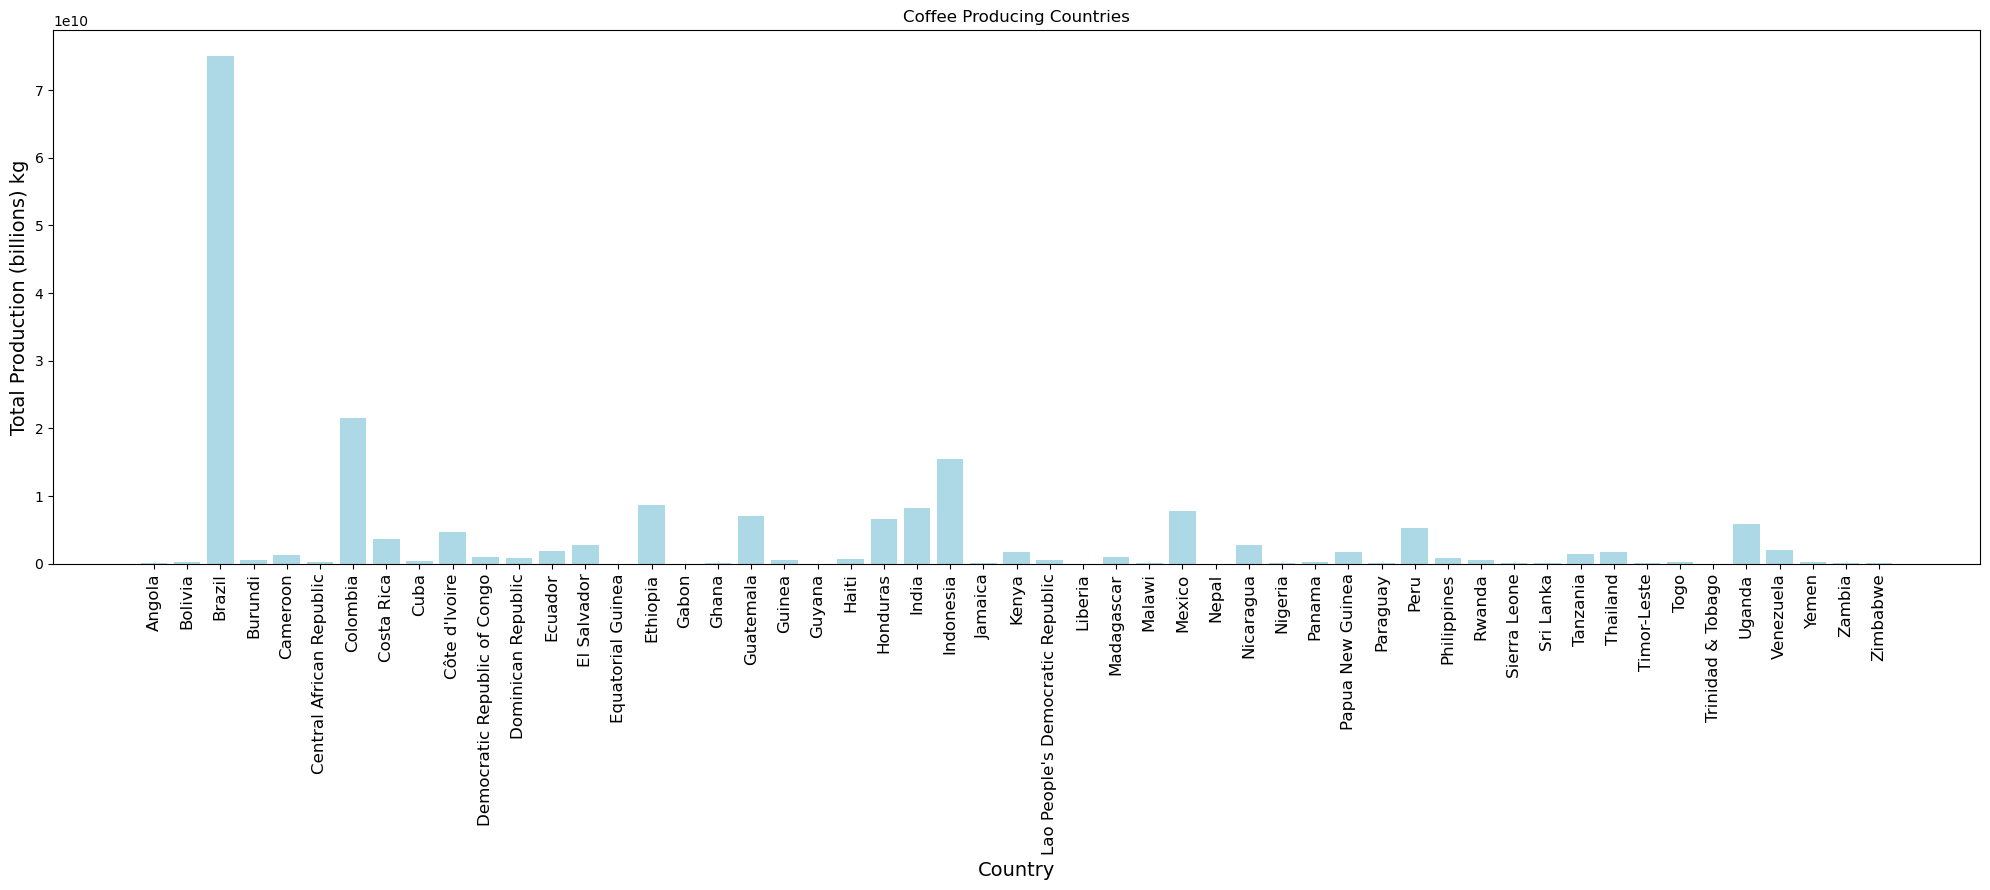

In [107]:
# Add bar graph here with countries and their outputs
plt.figure(figsize=(20, 9))
plt.bar(total_production_summary_statistics.index, total_production_summary_statistics['Total Production Sum'], color='lightblue')
plt.title('Coffee Producing Countries')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Production (billions) kg',fontsize=14)
plt.xticks(range(len(total_production_summary_statistics.index)), total_production_summary_statistics.index, rotation=90)
plt.tick_params(axis='x', labelsize=12)
plt.tight_layout()

# Save fig
plt.savefig('../Visuals/coffee_production/coffee_producing_countries.png')

plt.show()


In [108]:
# Summary statistics on summized country totals 
total_production_summary_statistics['Total Production Sum'].describe()

# Using Median or Mean to descrive 'avg' coffee production due to the data not being normally distributed
total_production_median = total_production_summary_statistics['Total Production Sum'].median()
print(f'The median of Total Coffee Production is {total_production_median} (kg).')

The median of Total Coffee Production is 623640000.0 (kg).


## Top 10 Coffee Producing Countries

           Total Production
Country                    
Brazil         7.508298e+10
Colombia       2.159862e+10
Indonesia      1.540488e+10
Ethiopia       8.669520e+09
India          8.222220e+09
Mexico         7.853520e+09
Guatemala      7.020540e+09
Honduras       6.672720e+09
Uganda         5.919480e+09
Peru           5.317620e+09


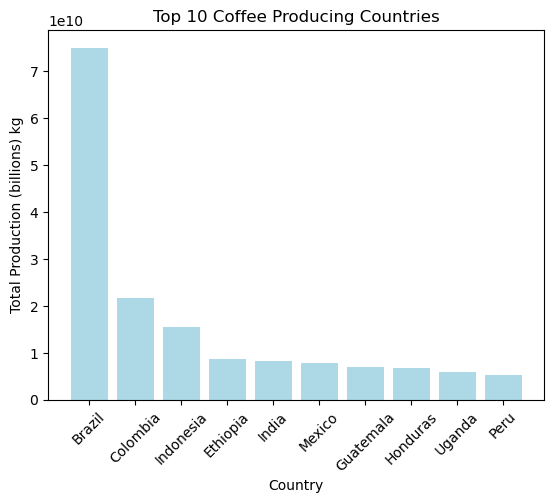

In [109]:
# Top 10 coffee producing countries
total_production = coffee_production_df.groupby('Country').agg({'Total Production': 'sum'})
top_10_countries = total_production.nlargest(10, 'Total Production')
print(top_10_countries)

# Add bar graph here with countries and their outputs
plt.bar(top_10_countries.index, top_10_countries['Total Production'], color='lightblue')
plt.title('Top 10 Coffee Producing Countries')
plt.xlabel('Country')
plt.ylabel('Total Production (billions) kg')
plt.xticks(rotation=45) 

# Save fig
plt.savefig('../Visuals/coffee_production/top_10_countries_bar.png')

plt.show()

<Figure size 900x900 with 0 Axes>

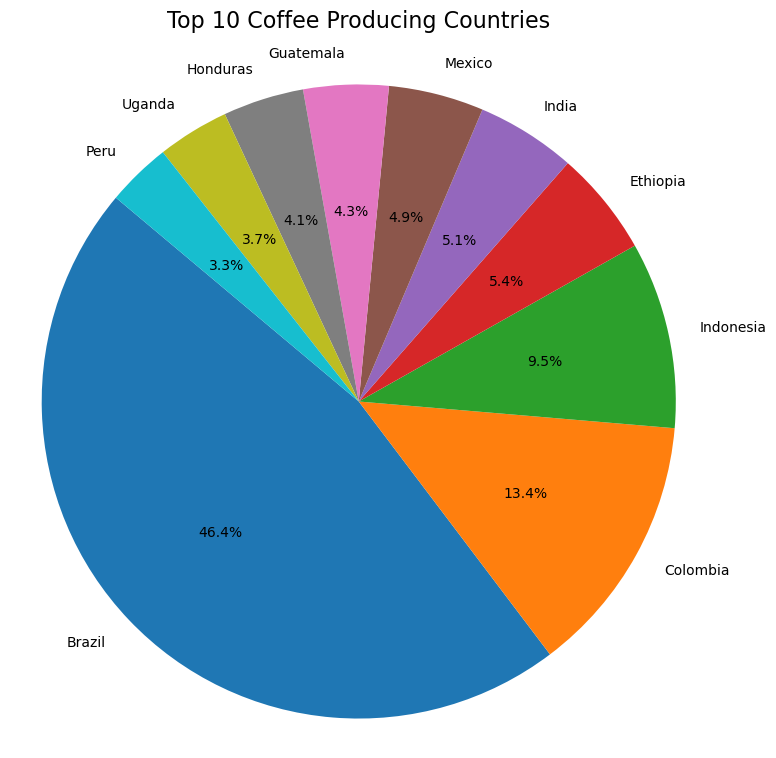

In [110]:
# Calculate percentages for each countries total production
plt.figure(figsize=(9, 9))
total_production = coffee_production_df.groupby('Country')['Total Production'].sum()
top_10_countries = total_production.nlargest(10)
percentages = (top_10_countries / top_10_countries.sum()) * 100

plt.figure(figsize=(9, 9))
plt.pie(percentages, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Coffee Producing Countries', fontsize=16, pad=20)
plt.axis('equal') 

# Save fig
plt.savefig('../Visuals/coffee_production/top_10_countries_pie.png')


plt.show()

In [111]:
# Save .csv to 'Cleaned' folder
coffee_production_df.to_csv('../Data/Cleaned/coffee_production_df.csv', index=False)
